## **Local Outlier Factor (LOF)**

On a higher level, LOF is based on two ideas: **KNN** and **density**

The core idea behind LOF is to compare the density of a point with its neighbors' density

If the density of a point is less than the density of its $k$ neighbors, we flag that point as an outlier

Lets understand it more intuitively.

#### **Intuition**

Imagine a bunch of datapoints as shown below

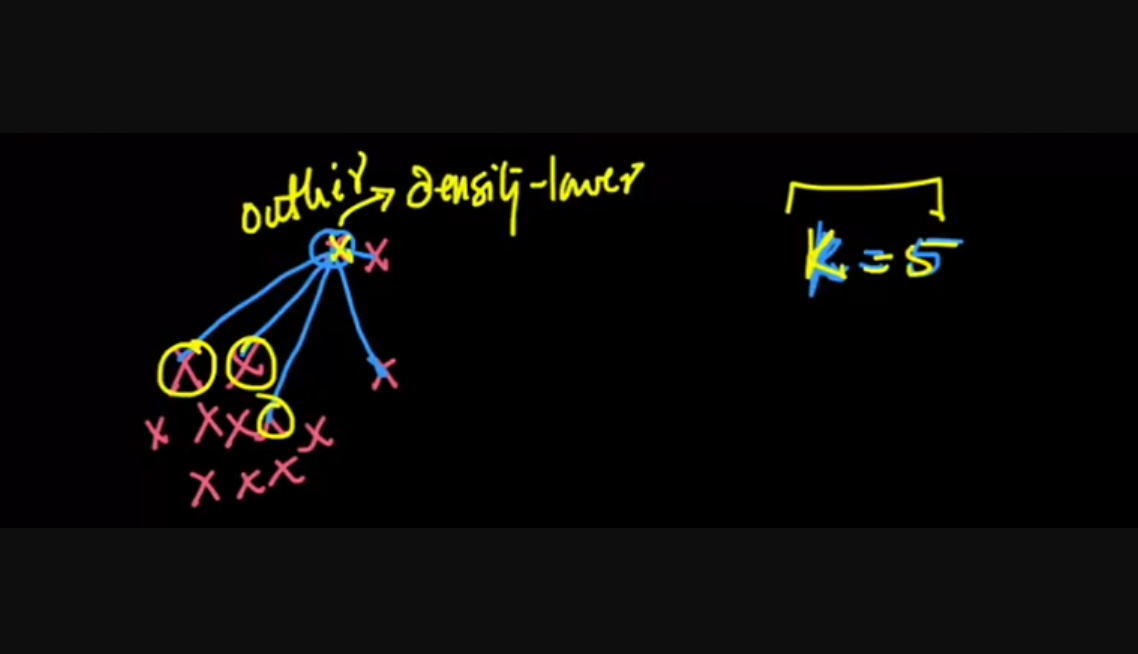

We compute the density of a point based on average distance.
  - if average distane between a point and its $k$ nearest neighbors is large, it is more likely that the point will be an outlier
  - also, larger the value of $k$, more confident are the results

Moving forward, lets get familiar with some concepts to understand the working of LOFs

##### 1(a) **K-distance**

- We define K-distance of a point $A$ as the distance of point $A$ to its **$k^{th}$ nearest neighbor**

- In general, larger the value of k-distance is, farther away the points is from other datapoints

##### 1(b) **Set: $N_{k}(A)$**

- It is a set of k-nearest neighbors of point $A$

##### **2. Reachability distance**

- From point $A$ to point $B$, we define reachability distance as **maximum** of the  distance from point $A$ to point $B$ and the k-distance of point $B$ as there is a possibilty that some neighbors might be close and some neighbors might be very far away.

##### **3. Local Reachability Density**

It is often represented as $lrd_{k}(A)$, which tells local reachability density of a point $A$

It is defined as the reciprocal of the average reachability distance between point $A$ and $k$ neighbors

So, $lrd_{k}(A) = \LARGE1/(\LARGE\frac{\sum_{B \in N_{k}(A)} rd_{k}(A,B)}{N_{k}(A)})$

  - The summation in above equation represents the sum of reachability distances from a point $A$ and set of neighbors $B$ as $B \in N_{k}(A)$

##  

##  

##  

##  

##  

#### **Putting all together**

We define Local Outlier Factore of point $A$ as follows:
  - $LOF_{k}(A)  = \LARGE\frac {\sum_{B \in N_{k}(A)} lrd_{k} (B) }  {|N_{k}(A)| . lrd_{k}(A)}$

$$$$

Whoa!!! This looks scary. What does it mean? Lets see.

$$$$

- $ldr_{k}(A)$ is nothing but the density of point $A$

$$$$

- The expression $\LARGE\frac {\sum_{B \in N_{k}(A)} lrd_{k} (B) }  {|N_{k}(A)|}$ is the average neighborhood density

- So, LOF of point $A$ is nothing but the average neighborhood density(lrd) of point $A$ divided by the density of $A$

#### **Interpretation of LOF**

Now that we know how to compute LOF for a given point, questions is how to interpret it? Let's see.

- If $LOF(A) = 1$, then we can say that the point $A$ has same density(lrd) as its $k$ nearest neighbors

- If $LOF(A) > 1$, then the $k$ neighbors of point $A$ have higher denstiy than point $A$.
  - That does not mean point $A$ is an outlier. It may or may not be.
  - But if $LOF(A) >> 1$, then point $A$ is definitely an outlier.

- If $LOF(A) < 1$, then point $A$ has more denstiy than its $k$ nearest neighbors.

We compute the LOF for each point, and based on that extract the outliers

## **`Implementing Local Outlier Factor Class from Scratch`**

In [ ]:
class LOF:
  import numpy as np

  @classmethod
  def get_K_nearest_neighbor_indexes(cls, idx, X, k):
    pt = X[[idx], :]
    dist = np.sqrt(np.sum((pt - X) ** 2, axis = 1))
    return np.argsort(dist)[1: k + 1]

  @classmethod
  def get_K_distance(cls, idx, X, k):
    pt1 = X[idx, :]
    pt2_idx = cls.get_K_nearest_neighbor_indexes(idx, X, k)[-1]
    pt2 = X[pt2_idx, :]
    K_dist = np.sqrt(np.sum((pt1 - pt2) ** 2))
    return K_dist

  @classmethod
  def get_reachability_distance(cls, idx1, idx2, X, k):
    pt1 = X[idx1, :]
    pt2 = X[idx2, :]
    dist_bw_pts = np.sqrt(np.sum((pt1 - pt2) ** 2))
    pt2_K_distance = cls.get_K_distance(idx2, X, k)
    reachability_distance = max(dist_bw_pts, pt2_K_distance)
    return reachability_distance

  @classmethod
  def get_local_reachability_density(cls, idx, X, k):
    k_neighbor_indexes = cls.get_K_nearest_neighbor_indexes(idx, X, k)
    k_neighbor_reachability_distances = [cls.get_reachability_distance(idx, idx2, X, k) for idx2 in k_neighbor_indexes]
    mean_reachability_distance = np.mean(k_neighbor_reachability_distances)
    return 1/mean_reachability_distance


  def __init__(self, n_neighbors = 20, contamination = 0.05):
    self.n_neighbors = n_neighbors
    self.contamination = contamination


  def fit_predict(self, X):
    n = X.shape[0]
    labels = np.ones(n)
    lofs = np.array([])

    for i in range(n):
      pt_lrd = LOF.get_local_reachability_density(i, X, self.n_neighbors)
      n_neighbor_indexes = LOF.get_K_nearest_neighbor_indexes(i, X, self.n_neighbors)
      n_neighbor_lrd = [LOF.get_local_reachability_density(j, X, self.n_neighbors) for j in n_neighbor_indexes]
      mean_neighbor_lrd = np.mean(n_neighbor_lrd)
      lof = mean_neighbor_lrd/pt_lrd
      lofs = np.append(lofs, lof)

    labels[lofs > np.percentile(lofs, 100 * (1 - self.contamination))] = -1
    self.negative_local_outlier_factor_ = -lofs
    self.labels_ = labels
    return labels

#### **Disadvantages of LOF**

1. Finding optimal K
2. Finding threshold.
  - If LOF(A) >> 1, what is the threshold??
3. Cannot handle high dimensional data efficiently
4. High Time Complexity

